ESPACIO PARA COLOCAR INTRODUCCIÓN ETC

In [1]:
#Verficamos la vesrión de python utilizada
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\descr\anaconda3\python.exe
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
#file_path = r'dataset.csv'
dataset = pd.read_csv("dataset.csv")

# Utilizamos el data.shape para conocer la cantidad de filas y columnas que tiene el dataset
print(f'Tamano del Set antes de eliminar repetidos: {dataset.shape}')
dataset.drop_duplicates(inplace=True)
print(f'Tamano del Set despues de eliminar repetidos: {dataset.shape}')

Tamano del Set antes de eliminar repetidos: (4424, 35)
Tamano del Set despues de eliminar repetidos: (4424, 35)


In [5]:
# Imprimimos los 10 primeros registros
print("Los 10 primeros registros son: ")
dataset.head(10)

Los 10 primeros registros son: 


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [6]:
# Revisamos el tipo de datos que posee el dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
#Esta función me cuenta cuantos valores nulos tengo por columnas
print("Verificación de datos nulos:")
dataset.isnull().sum()

Verificación de datos nulos:


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Correlación de atributos con el objetivo:
Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Father's occupation                               0.051702
Mother's occupation                               0.048424
Curricular uni

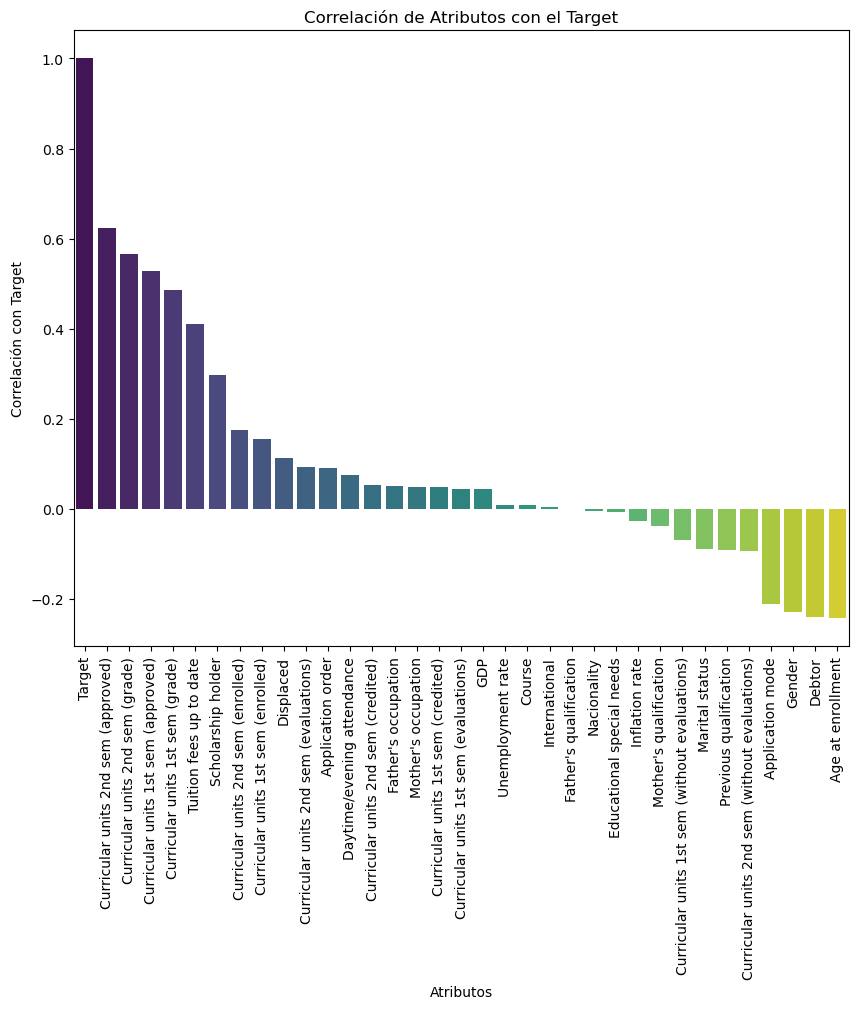

Pares de atributos con alta correlación con el target y sus coeficientes de correlación:
Curricular units 2nd sem (approved) y Target: 0.62
Curricular units 2nd sem (grade) y Target: 0.57
Curricular units 1st sem (approved) y Target: 0.53
El archivo con las columnas de alta correlación con el target se ha guardado en: C:\Users\descr\Desktop\high_corr_with_target_dataset.csv


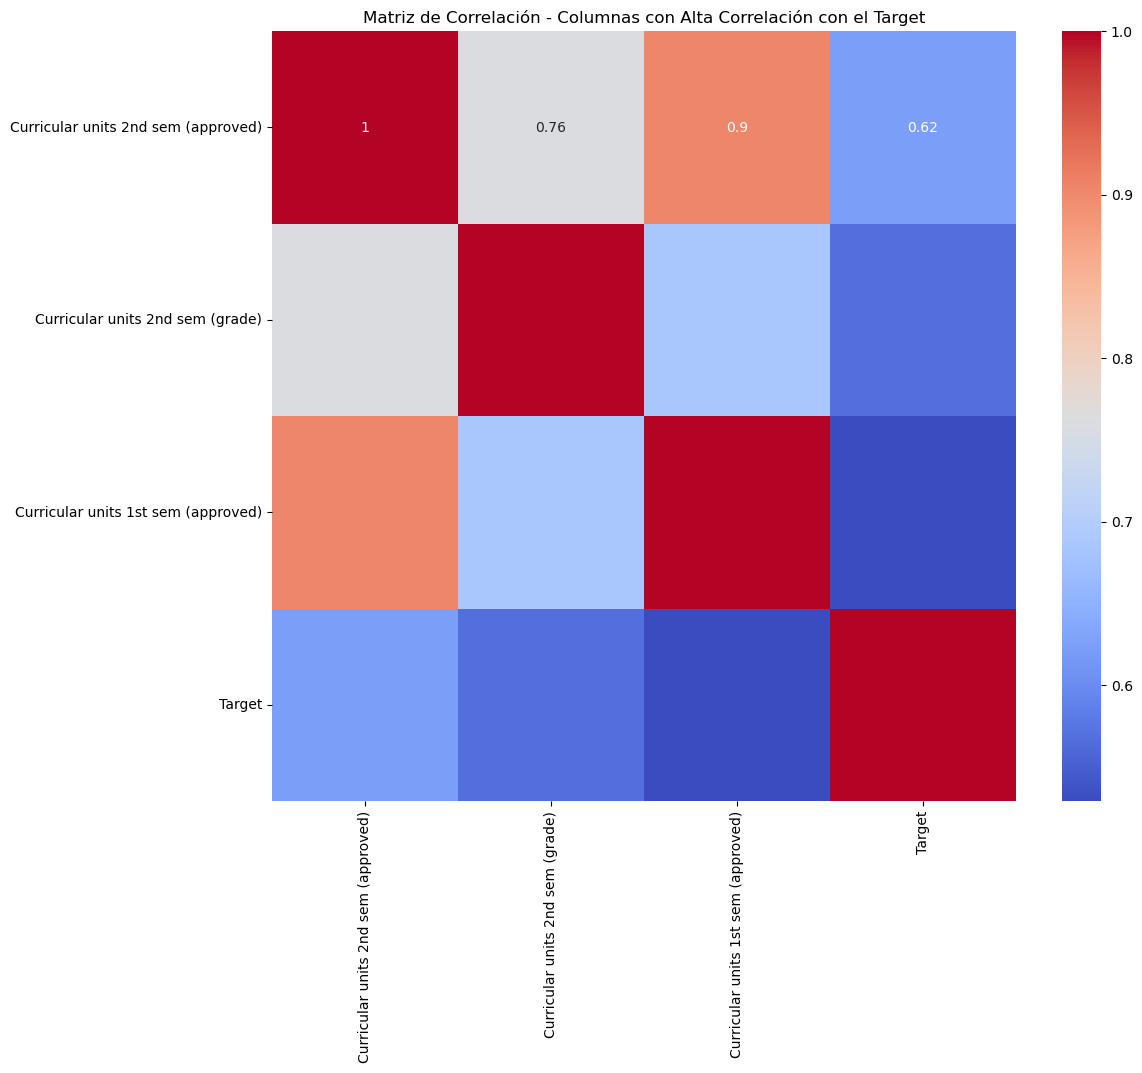

In [11]:
# Convertir la columna objetivo a valores numéricos
le = LabelEncoder()
dataset['Target'] = le.fit_transform(dataset['Target'])

# Análisis de correlación con la columna objetivo
correlation_with_target = dataset.corr()['Target'].sort_values(ascending=False)

# Mostrar la correlación de cada atributo con la columna objetivo
print("Correlación de atributos con el objetivo:")
print(correlation_with_target)

# Visualización de la correlación con la columna objetivo
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlación de Atributos con el Target')
plt.xticks(rotation=90)
plt.xlabel('Atributos')
plt.ylabel('Correlación con Target')
plt.show()

# Umbral de correlación alta
correlation_threshold = 0.5

# Filtrar las columnas que tienen alta correlación con el target
high_corr_with_target_columns = [col for col in correlation_with_target.index if abs(correlation_with_target[col]) > correlation_threshold and col != 'Target']

# Crear una nueva matriz de datos con las columnas de alta correlación con el target
high_corr_with_target_dataset = dataset[high_corr_with_target_columns + ['Target']]

# Guardar la nueva matriz de datos en un archivo CSV
high_corr_with_target_file_path = r'C:\Users\descr\Desktop\high_corr_with_target_dataset.csv'
high_corr_with_target_dataset.to_csv(high_corr_with_target_file_path, index=False)

# Imprimir los pares con alta correlación con el target y sus coeficientes de correlación
print("Pares de atributos con alta correlación con el target y sus coeficientes de correlación:")
for col in high_corr_with_target_columns:
    print(f"{col} y Target: {correlation_with_target[col]:.2f}")

print(f"El archivo con las columnas de alta correlación con el target se ha guardado en: {high_corr_with_target_file_path}")

# Leer el archivo CSV con las columnas de alta correlación con el target
high_corr_with_target_dataset = pd.read_csv(high_corr_with_target_file_path)

# Calcular la matriz de correlación
high_corr_with_target_correlation_matrix = high_corr_with_target_dataset.corr()

# Visualización de la nueva matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr_with_target_correlation_matrix, annot=True, cmap='coolwarm', xticklabels=high_corr_with_target_dataset.columns, yticklabels=high_corr_with_target_dataset.columns)
plt.title('Matriz de Correlación - Columnas con Alta Correlación con el Target')
plt.show()

In [19]:
# Seleccionar data por columna para verificar la correlacion 
specific = dataset[["Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Tuition fees up to date", "Scholarship holder", "Curricular units 2nd sem (enrolled)", "Curricular units 1st sem (enrolled)", "Displaced", "Curricular units 2nd sem (evaluations)", "Application order", "Daytime/evening attendance", "Curricular units 2nd sem (credited)", "Father's occupation", "Mother's occupation", "Curricular units 1st sem (credited)", "Curricular units 1st sem (evaluations)", "GDP", "Unemployment rate", "Course", "International", "Father's qualification", "Nacionality", "Educational special needs", "Inflation rate", "Mother's qualification", "Curricular units 1st sem (without evaluations)", "Marital status", "Previous qualification", "Curricular units 2nd sem (without evaluations)", "Application mode",  "Debtor", "Gender", "Age at enrollment"]]
#Buscar correlacion por colummnas seleccionadas
correlacion = specific.corr()
correlacion

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Displaced,Curricular units 2nd sem (evaluations),...,Inflation rate,Mother's qualification,Curricular units 1st sem (without evaluations),Marital status,Previous qualification,Curricular units 2nd sem (without evaluations),Application mode,Debtor,Gender,Age at enrollment
Curricular units 2nd sem (approved),1.000000,0.760804,0.904002,0.673335,0.291921,0.202704,0.703258,0.673341,0.063698,0.463535,...,-0.024566,-0.013161,-0.013070,-0.043739,-0.037265,-0.061567,-0.065203,-0.146977,-0.224266,-0.112052
Curricular units 2nd sem (grade),0.760804,1.000000,0.685560,0.837170,0.296480,0.181227,0.395135,0.361959,0.069087,0.453394,...,-0.038166,-0.028472,-0.061482,-0.071506,-0.038765,-0.079216,-0.104424,-0.139424,-0.199133,-0.173419
Curricular units 1st sem (approved),0.904002,0.685560,1.000000,0.696113,0.239347,0.153772,0.733772,0.769083,0.047682,0.539934,...,-0.007114,-0.010555,-0.013360,-0.031027,-0.005295,-0.053983,-0.023713,-0.106657,-0.183829,-0.053405
Curricular units 1st sem (grade),0.673335,0.837170,0.696113,1.000000,0.250394,0.168324,0.406167,0.376996,0.064815,0.487236,...,-0.033904,-0.034105,-0.071660,-0.059811,-0.034252,-0.066076,-0.106213,-0.104170,-0.189448,-0.156616
Tuition fees up to date,0.291921,0.296480,0.239347,0.250394,1.000000,0.137421,0.085918,0.058721,0.096027,0.063482,...,-0.000706,-0.022861,-0.049775,-0.087158,-0.095246,-0.071817,-0.127339,-0.408454,-0.104098,-0.178099
Scholarship holder,0.202704,0.181227,0.153772,0.168324,0.137421,1.000000,0.026416,-0.004927,0.072887,-0.021410,...,-0.031104,0.048225,-0.057770,-0.053765,-0.085668,-0.048723,-0.152818,-0.067489,-0.169302,-0.189917
Curricular units 2nd sem (enrolled),0.703258,0.395135,0.733772,0.406167,0.085918,0.026416,1.000000,0.942627,-0.041823,0.604821,...,0.016844,0.033070,0.109924,0.039026,0.056450,0.067697,0.127461,-0.029436,-0.124227,0.085914
Curricular units 1st sem (enrolled),0.673341,0.361959,0.769083,0.376996,0.058721,-0.004927,0.942627,1.000000,-0.063812,0.599567,...,0.036758,0.050582,0.129337,0.052107,0.080860,0.069547,0.159547,-0.010652,-0.095253,0.141327
Displaced,0.063698,0.069087,0.047682,0.064815,0.096027,0.072887,-0.041823,-0.063812,1.000000,-0.038839,...,-0.012385,-0.075864,-0.021671,-0.234886,-0.149356,-0.035959,-0.263079,-0.089901,-0.125815,-0.362032
Curricular units 2nd sem (evaluations),0.463535,0.453394,0.539934,0.487236,0.063482,-0.021410,0.604821,0.599567,-0.038839,1.000000,...,-0.012643,0.018874,0.144683,0.022784,0.101501,0.144877,0.164992,0.024201,-0.041789,0.056286
